Questions

1. Gender Distribution:
   - Analyze the distribution of customers based on gender. What is the proportion of male and female customers?

2. Annual Income Analysis:
   - Explore the distribution of annual income. What is the average annual income of customers? Are there any outliers in the data?

3. Car Price vs. Annual Income:
   - Investigate the relationship between car prices and customers' annual income. Are there any patterns or correlations?

4. Popular Car Models:
   - Identify the most popular car models among customers. Which models have the highest sales?

5. Transmission Preference:
   - Analyze the preference for manual vs. automatic transmission among customers. Which type of transmission is more common?

6. Dealer Performance:
   - Evaluate the performance of different dealers. Which dealers have the highest sales? Are there any correlations between dealer performance and customer satisfaction?

7. Body Style Distribution:
   - Explore the distribution of cars based on body style (e.g., SUV, Passenger). Which body style is more popular among customers?

8. Color Preferences:
   - Analyze the color preferences of customers. Are there certain colors that are more popular for cars?

9. Geographic Analysis:
   - Explore the distribution of dealers across different regions. Are there certain regions with higher car sales?

10. Time Trend Analysis:
    - Investigate any trends over time by analyzing the sales data based on the date. Are there specific months or seasons with higher sales?

11. Correlation Between Variables:
    - Examine correlations between variables (e.g., annual income, car price, engine size). Are there any significant relationships?

12. Customer Demographics:
    - Explore the demographic information of customers. What is the average age of customers? Are there patterns in terms of income, age, and car preferences?

In [1]:
#IMPORT PACKAGES
import pandas  as pd
import numpy   as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("C:\\Users\\Ivank\\Downloads\\Car Sales.csv")

# Previewing the Data

In [3]:
df.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
df.shape

(23906, 16)

In [5]:
df.info

<bound method DataFrame.info of              Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001  01/02/2022     Geraldine    Male          13500   
1      C_CND_000002  01/02/2022           Gia    Male        1480000   
2      C_CND_000003  01/02/2022        Gianna    Male        1035000   
3      C_CND_000004  01/02/2022       Giselle    Male          13500   
4      C_CND_000005  01/02/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Ser

In [6]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,23906.0,8.308403e+05,720006.395388,10080.0,386000.0,735000.0,1175750.00,11200000.0
Price ($),23906.0,2.809025e+04,14788.687608,1200.0,18001.0,23000.0,34000.00,85800.0
Phone,23906.0,7.497741e+06,867491.995669,6000101.0,6746495.0,7496197.5,8248146.25,8999579.0


In [8]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [9]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [10]:
#numerical features
num_col = ['Annual Income','Price ($)','Phone']

#categorical features
cat_col = ['Car_id', 'Date', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region']

# Data Cleaning

In [11]:
#Check for null values
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [12]:
# Assuming 'Customer Name' is the column with missing values
df['Customer Name'].fillna(value='Unknown', inplace=True)

In [13]:
#Check for null values
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [14]:
#Check for duplicates in the dataset
df.duplicated().sum()

0

In [15]:
# Assuming df is your DataFrame
duplicates = df[df.duplicated(keep=False)]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
Empty DataFrame
Columns: [Car_id, Date, Customer Name, Gender, Annual Income, Dealer_Name, Company, Model, Engine, Transmission, Color, Price ($), Dealer_No , Body Style, Phone, Dealer_Region]
Index: []


# Data Preprocessing

In [16]:
# Use the first 2500 entries form the dataset
# subset_data = df.head(2500)

In [17]:
# df = subset_data

# Exploratory Data Analysis

# A. Univariate Analysis

1. Gender Distribution:

Proportion of Male Customers: 78.63%
Proportion of Female Customers: 21.37%


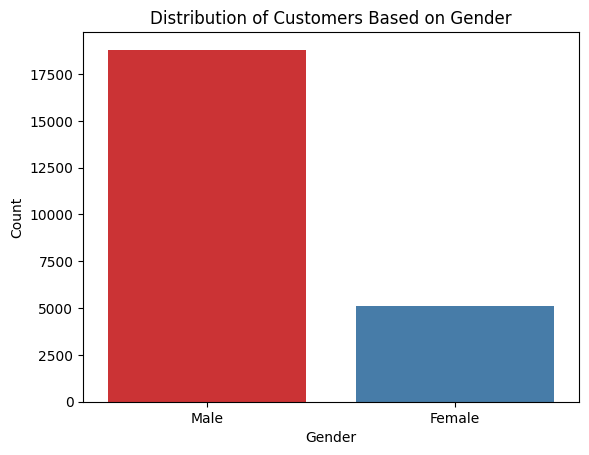

In [18]:
# Assuming df is your DataFrame with a 'Gender' column

# Count the number of male and female customers
gender_counts = df['Gender'].value_counts()

# Calculate the proportion of male and female customers
total_customers = len(df)
proportion_male = gender_counts.get('Male', 0) / total_customers
proportion_female = gender_counts.get('Female', 0) / total_customers

# Print the results
print(f"Proportion of Male Customers: {proportion_male:.2%}")
print(f"Proportion of Female Customers: {proportion_female:.2%}")

# Plot a bar chart to visualize the distribution
sns.countplot(data=df, x='Gender', palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Customers Based on Gender')
plt.show()

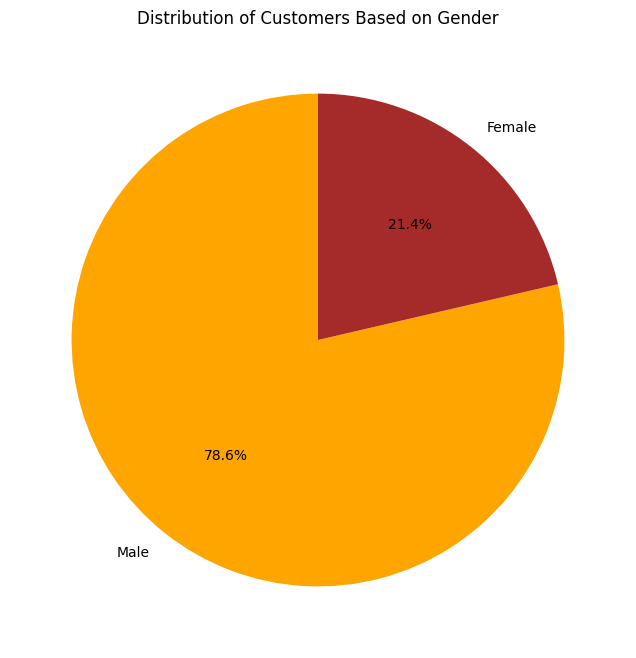

In [19]:
# Assuming df is your DataFrame with a 'Gender' column

# Count the number of male and female customers
gender_counts = df['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'brown'])
plt.title('Distribution of Customers Based on Gender')
plt.show()

2. Annual Income Analysis:

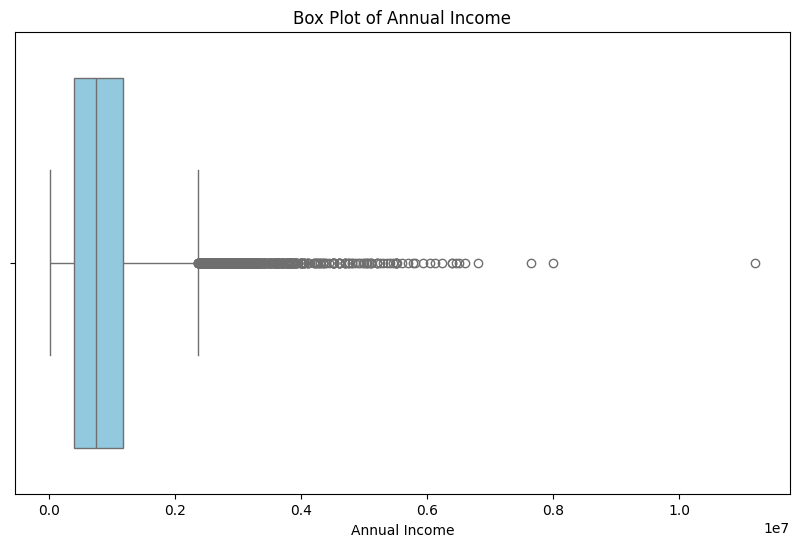

Average Annual Income: 830840.29
Number of outliers: 816


In [20]:
# Assuming df is your DataFrame with an 'Annual Income' column

# Explore the distribution of annual income with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Annual Income'], color='skyblue')
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

# Calculate the average annual income
average_income = df['Annual Income'].mean()
print(f'Average Annual Income: {average_income:.2f}')

# Identify outliers using the Interquartile Range (IQR) method
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Annual Income'] < lower_bound) | (df['Annual Income'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')

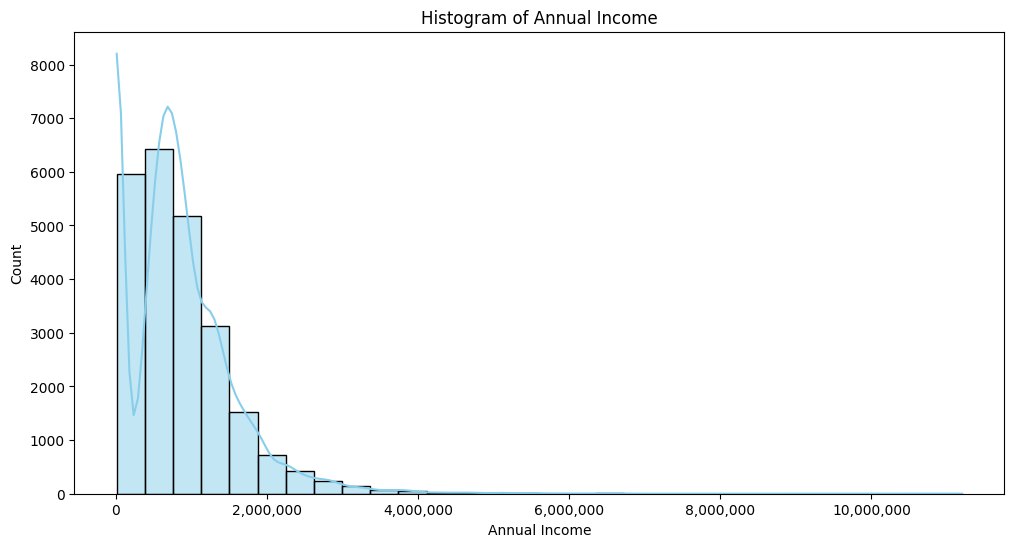

In [21]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Drop NaN values from 'Annual Income' column
df['Annual Income'].dropna(inplace=True)

# Plot the bar graph
sns.histplot(df['Annual Income'], bins=30, kde=True, color='skyblue', ax=ax, element="bars")
#kde=True add the curvy line

# Set labels and title
ax.set_xlabel('Annual Income')
ax.set_ylabel('Count')
ax.set_title('Histogram of Annual Income')

# Set the x-axis ticker to use plain numerical format
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.show()

4. Popular Car Models:

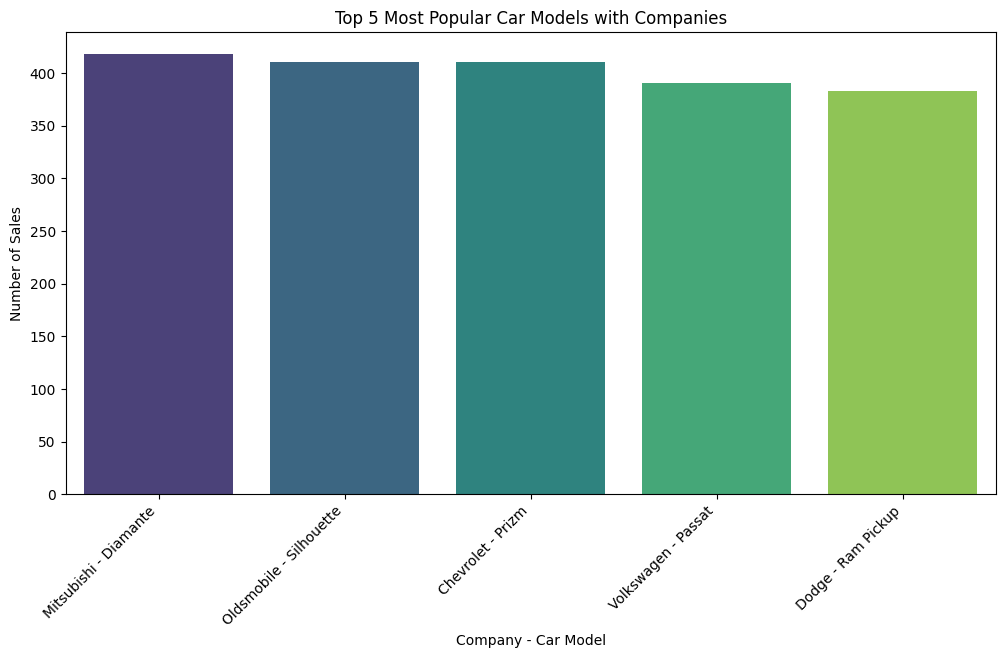

In [22]:
# Assuming df is your DataFrame with 'Company' and 'Model' columns

# Combine 'Company' and 'Model' to create a new column 'Company_Model'
df['Company_Model'] = df['Company'] + ' - ' + df['Model']

# Group by combined car company and model, and count the number of sales for each combination
company_model_sales = df['Company_Model'].value_counts()

# Display the top N most popular company-model combinations (adjust N as needed)
top_n_company_model = 5
top_company_model = company_model_sales.head(top_n_company_model)

# Plot a bar chart to visualize the popularity of car company-model combinations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_company_model.index, y=top_company_model.values, palette='viridis')
plt.xlabel('Company - Car Model')
plt.ylabel('Number of Sales')
plt.title(f'Top {top_n_company_model} Most Popular Car Models with Companies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

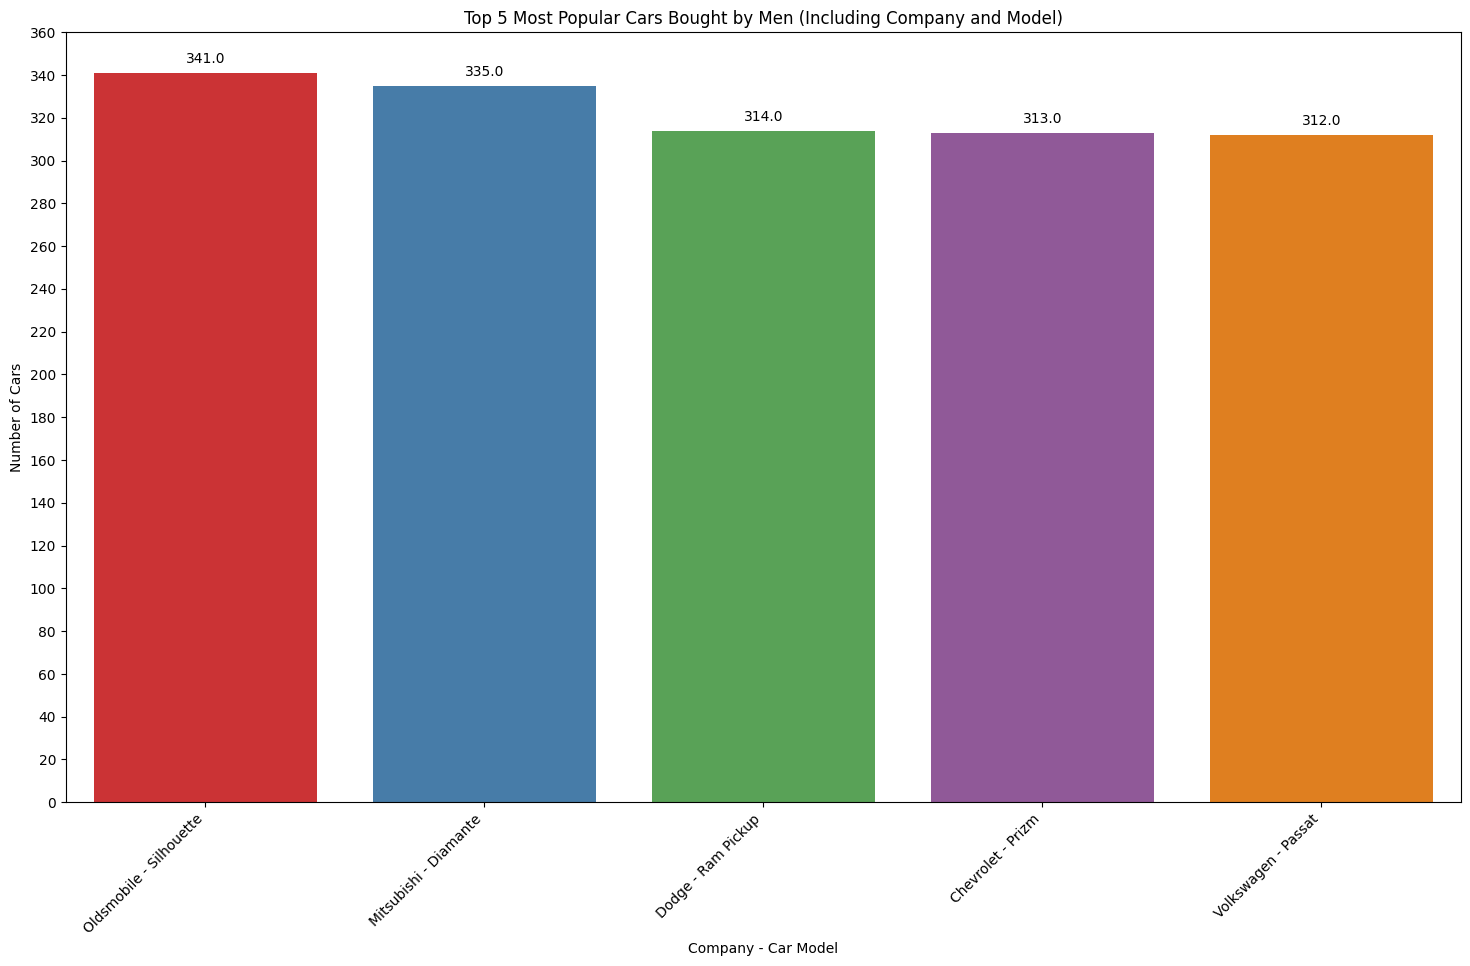

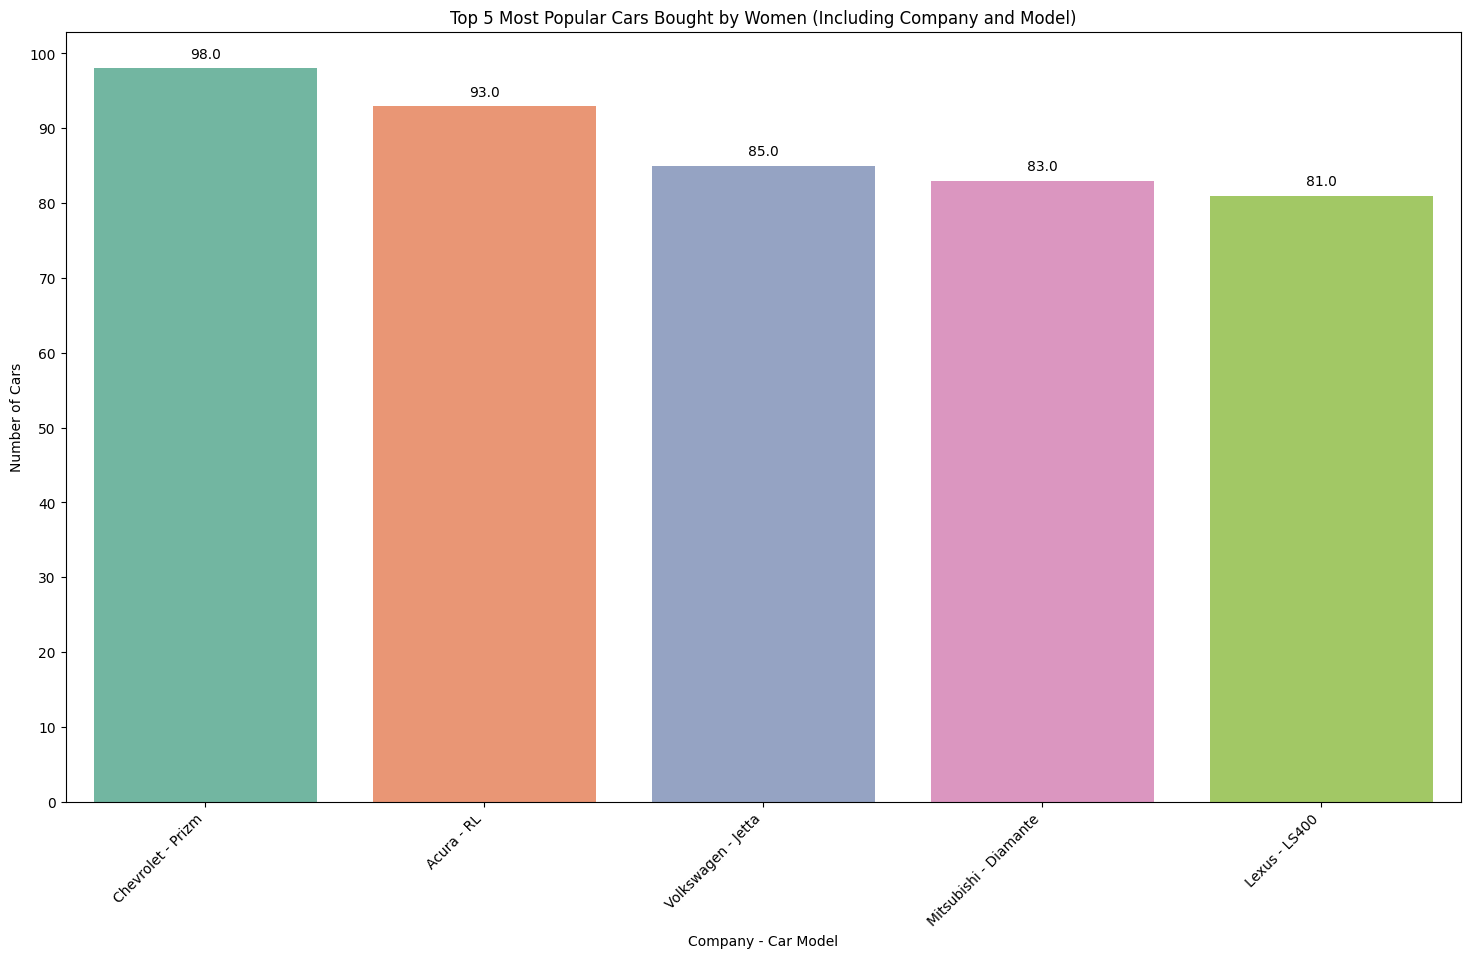

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'Company', 'Model', and 'Gender' columns

# Combine 'Company' and 'Model' to create a new column 'Company_Model'
df['Company_Model'] = df['Company'] + ' - ' + df['Model']

# Get the top 5 most popular car models based on sales for men
top_models_men = df[df['Gender'] == 'Male']['Company_Model'].value_counts().nlargest(5).index

# Filter the DataFrame for the top models for men
df_top_models_men = df[(df['Company_Model'].isin(top_models_men)) & (df['Gender'] == 'Male')]

# Get the maximum count for setting y-axis scale
max_count_men = df_top_models_men['Company_Model'].value_counts().max()

# Create a grouped bar plot to visualize the distribution for men
plt.figure(figsize=(18, 10))
bar_plot_men = sns.countplot(data=df_top_models_men, x='Company_Model', palette='Set1', order=top_models_men)

# Annotate the number of sales on top of each bar
for p in bar_plot_men.patches:
    bar_plot_men.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set y-axis ticks with intervals of 20
plt.yticks(range(0, max_count_men + 20, 20))

plt.xlabel('Company - Car Model')
plt.ylabel('Number of Cars')
plt.title('Top 5 Most Popular Cars Bought by Men (Including Company and Model)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Get the top 5 most popular car models based on sales for women
top_models_women = df[df['Gender'] == 'Female']['Company_Model'].value_counts().nlargest(5).index

# Filter the DataFrame for the top models for women
df_top_models_women = df[(df['Company_Model'].isin(top_models_women)) & (df['Gender'] == 'Female')]

# Get the maximum count for setting y-axis scale
max_count_women = df_top_models_women['Company_Model'].value_counts().max()

# Create a grouped bar plot to visualize the distribution for women
plt.figure(figsize=(18, 10))
bar_plot_women = sns.countplot(data=df_top_models_women, x='Company_Model', palette='Set2', order=top_models_women)

# Annotate the number of sales on top of each bar
for p in bar_plot_women.patches:
    bar_plot_women.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set y-axis ticks with intervals of 10
plt.yticks(range(0, max_count_women + 10, 10))

plt.xlabel('Company - Car Model')
plt.ylabel('Number of Cars')
plt.title('Top 5 Most Popular Cars Bought by Women (Including Company and Model)')
plt.xticks(rotation=45, ha='right')
plt.show()


5. Transmission Preference:

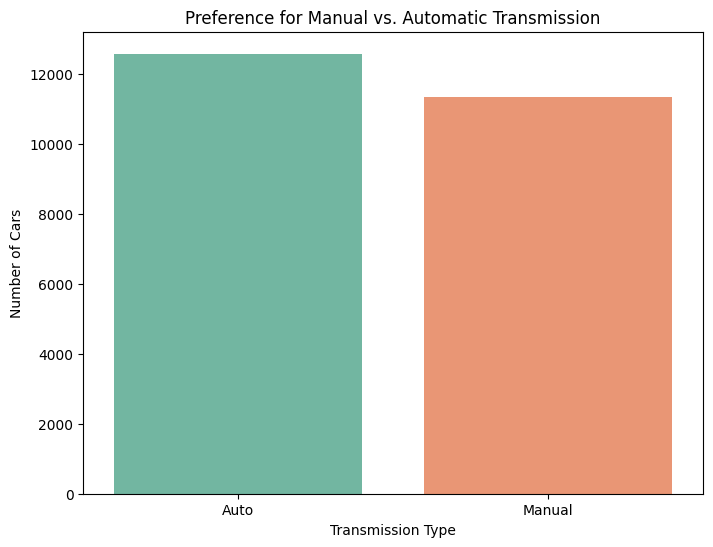

In [24]:
# Assuming df is your DataFrame with a 'Transmission' column

# Count the number of cars with each type of transmission
transmission_counts = df['Transmission'].value_counts()

# Plot a bar chart to visualize the preference for manual vs. automatic transmission
plt.figure(figsize=(8, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='Set2')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.title('Preference for Manual vs. Automatic Transmission')
plt.show()

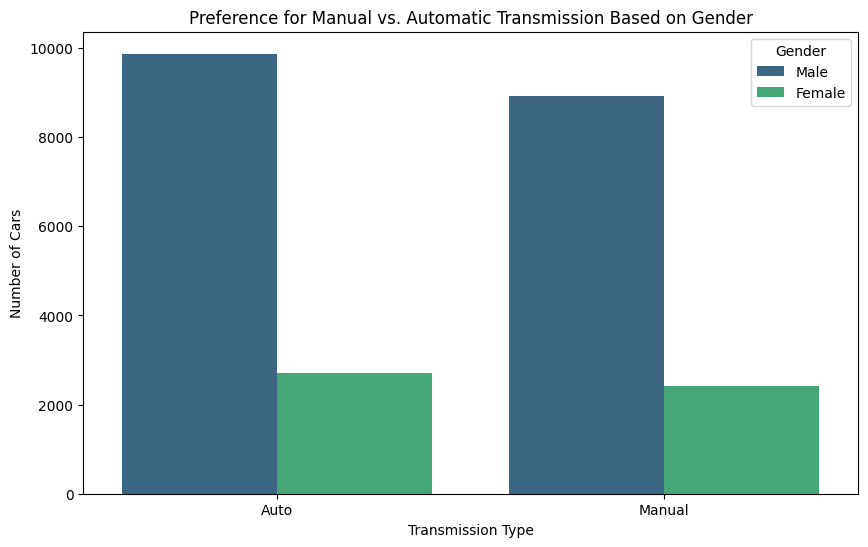

In [25]:
# Assuming df is your DataFrame with 'Transmission' and 'Gender' columns

# Create a countplot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Transmission', hue='Gender', palette='viridis')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.title('Preference for Manual vs. Automatic Transmission Based on Gender')
plt.legend(title='Gender')
plt.show()

6. Dealer Performance:

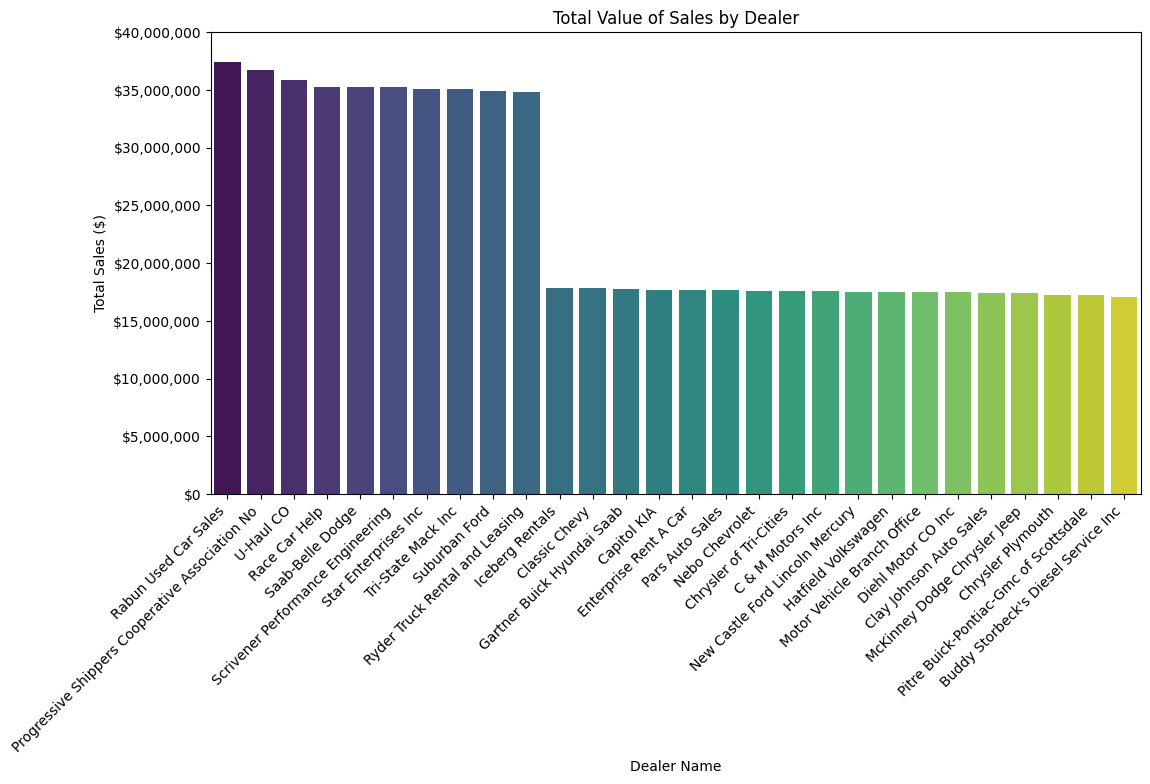

In [26]:
# Assuming df is your DataFrame with sales data
# Replace 'Price ($)' and 'Dealer_Name' with the actual column names in your DataFrame

# Group by dealer and calculate total sales
dealer_performance = df.groupby('Dealer_Name')['Price ($)'].sum().reset_index()

# Sort dealers based on total sales
dealer_performance = dealer_performance.sort_values(by='Price ($)', ascending=False)

# Plot bar chart for total sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Dealer_Name', y='Price ($)', data=dealer_performance, palette='viridis')

# Format y-axis ticks without scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

# Set y-axis limit to go up to $40,000,000
plt.ylim(0, 40000000)

plt.xlabel('Dealer Name')
plt.ylabel('Total Sales ($)')
plt.title('Total Value of Sales by Dealer')
plt.xticks(rotation=45, ha='right')
plt.show()

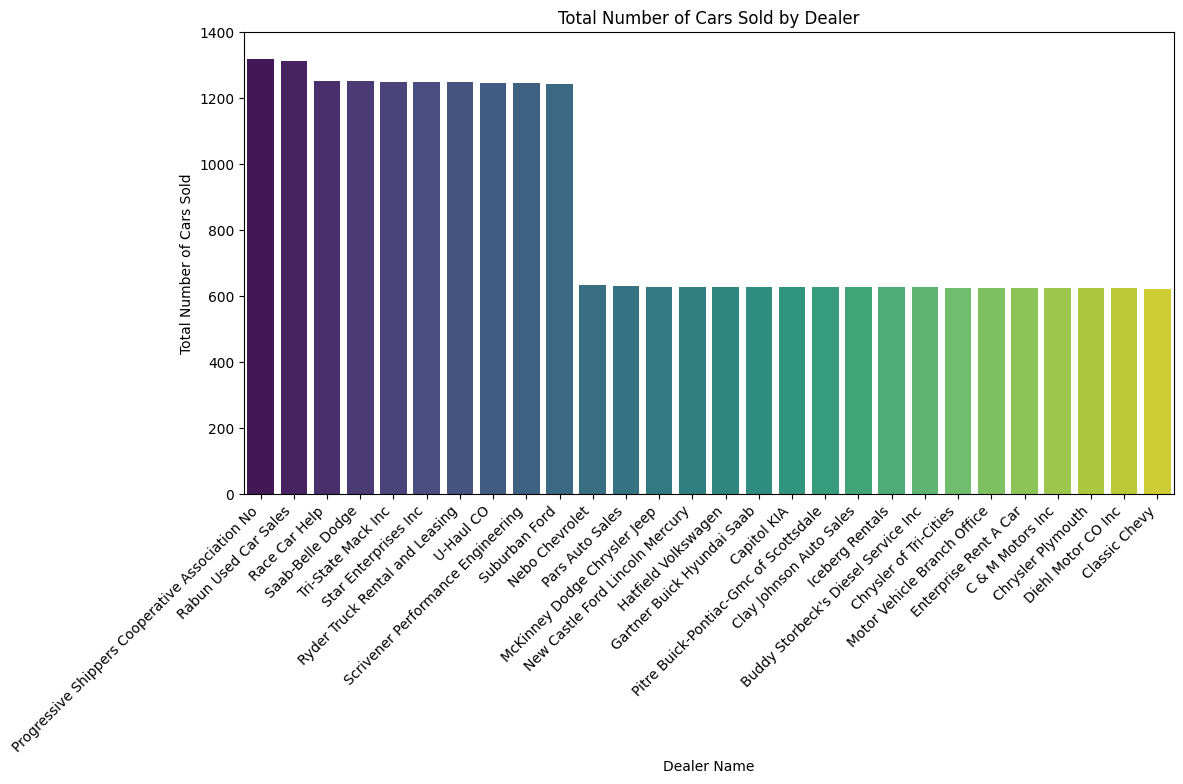

In [27]:
# Assuming df is your DataFrame with sales data
# Replace 'Dealer_Name' and 'Model' with the actual column names in your DataFrame

# Group by dealer and model, and calculate the count of cars sold
dealer_model_sales = df.groupby(['Dealer_Name', 'Model']).size().reset_index(name='Number_of_Cars_Sold')

# Sum the counts to get the total number of cars sold by each dealer
dealer_sales = dealer_model_sales.groupby('Dealer_Name')['Number_of_Cars_Sold'].sum().reset_index()

# Sort dealers based on total number of cars sold
dealer_sales = dealer_sales.sort_values(by='Number_of_Cars_Sold', ascending=False)

# Plot bar chart for total number of cars sold
plt.figure(figsize=(12, 6))
sns.barplot(x='Dealer_Name', y='Number_of_Cars_Sold', data=dealer_sales, palette='viridis')

# Set y-axis limit to go up to 1,400
plt.ylim(0, 1400)

plt.xlabel('Dealer Name')
plt.ylabel('Total Number of Cars Sold')
plt.title('Total Number of Cars Sold by Dealer')
plt.xticks(rotation=45, ha='right')
plt.show()

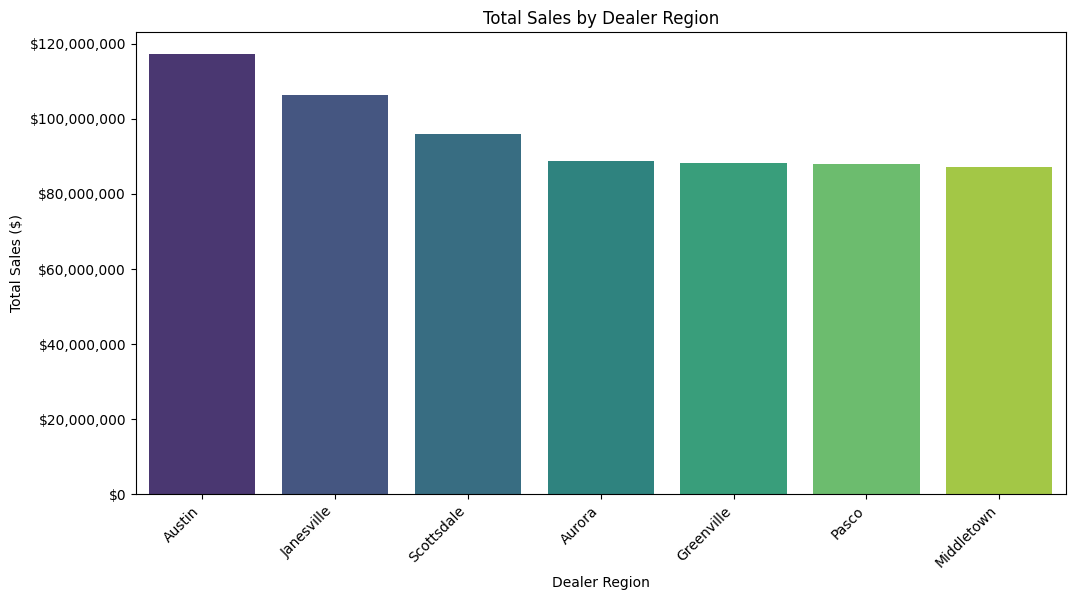

The region with the most sales is: Austin


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame with sales data
# Replace 'Price ($)' and 'Dealer_Region' with the actual column names in your DataFrame

# Group by region and calculate total sales
region_sales = df.groupby('Dealer_Region')['Price ($)'].sum().reset_index()

# Sort regions based on total sales
region_sales = region_sales.sort_values(by='Price ($)', ascending=False)

# Get the region with the most sales
most_sales_region = region_sales.iloc[0]['Dealer_Region']

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Dealer_Region', y='Price ($)', data=region_sales, palette='viridis')

# Format y-axis ticks without scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.xlabel('Dealer Region')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Dealer Region')
plt.xticks(rotation=45, ha='right')
plt.show()

print(f'The region with the most sales is: {most_sales_region}')


7. Body Style Distribution:

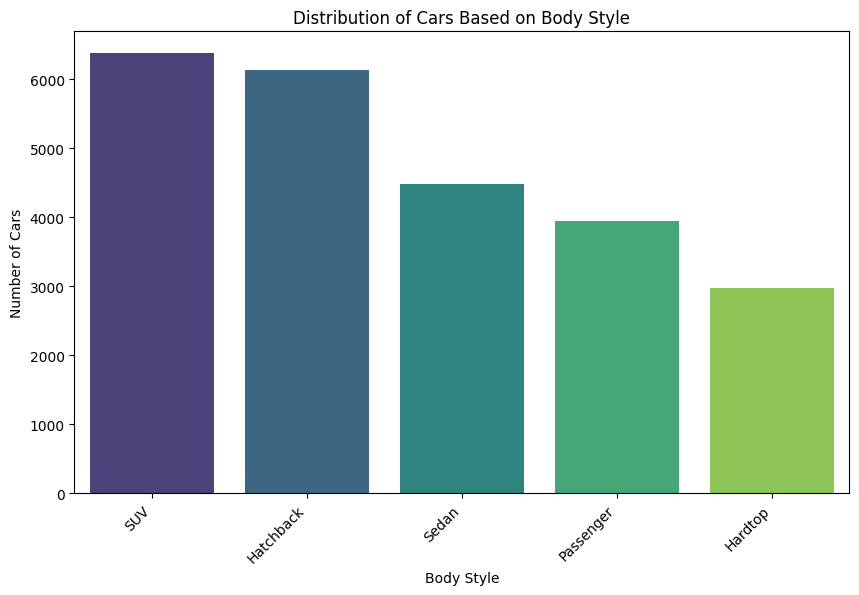

In [29]:
# Assuming df is your DataFrame with sales data
# Replace 'Body Style' with the actual column name in your DataFrame

# Count the number of cars for each body style
body_style_counts = df['Body Style'].value_counts()

# Plot a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='viridis')

plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars Based on Body Style')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x600 with 0 Axes>

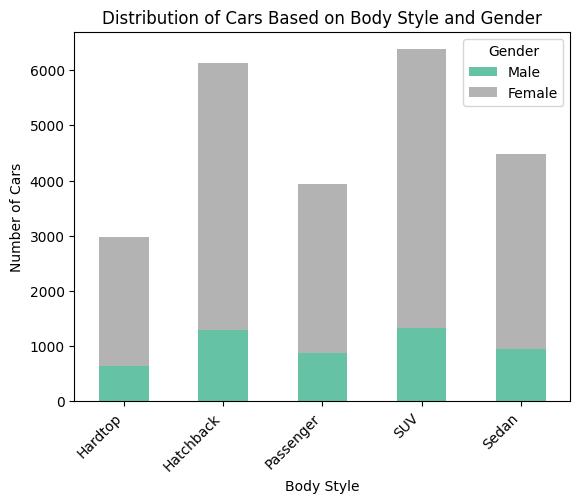

In [30]:
# Assuming df is your DataFrame with sales data
# Replace 'Body Style' and 'Gender' with the actual column names in your DataFrame

# Count the number of cars for each body style and gender
body_style_gender_counts = df.groupby(['Body Style', 'Gender']).size().unstack(fill_value=0)

# Plot a grouped bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
body_style_gender_counts.plot(kind='bar', stacked=True, colormap='Set2')

plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars Based on Body Style and Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'], loc='upper right')
plt.show()

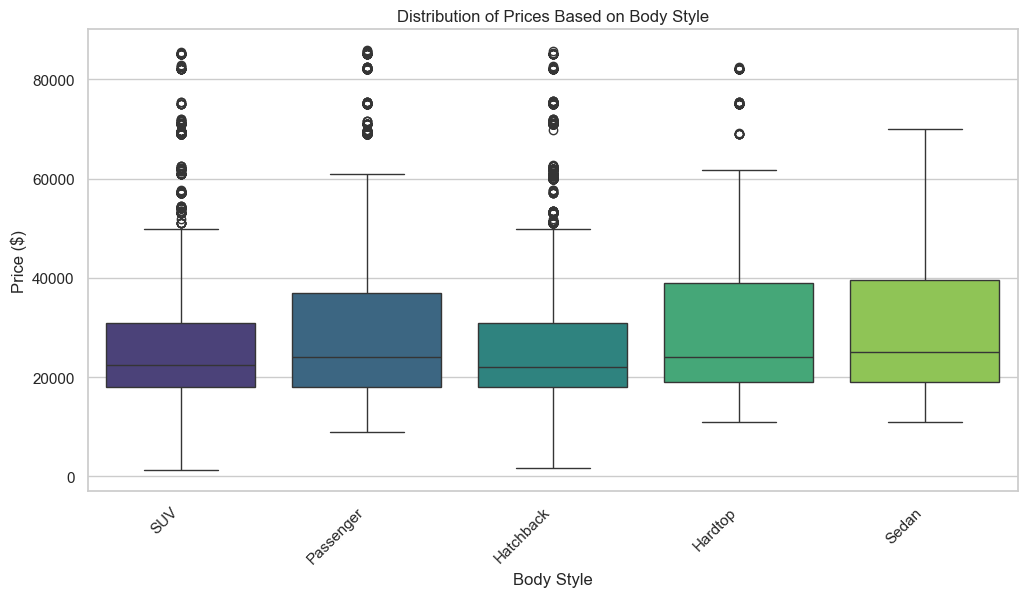

In [31]:
# Assuming df is your DataFrame with sales data
# Replace 'Body Style' and 'Price ($)' with the actual column names in your DataFrame

# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot to show the distribution of prices for each body style
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', data=df, palette='viridis')

plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.title('Distribution of Prices Based on Body Style')
plt.xticks(rotation=45, ha='right')
plt.show()

- Hardtops are priced higher compared to other bodystyles
- However the other bodystyles have several outliers which are highly priced notably Hatchbacks

8. Color Preferences:

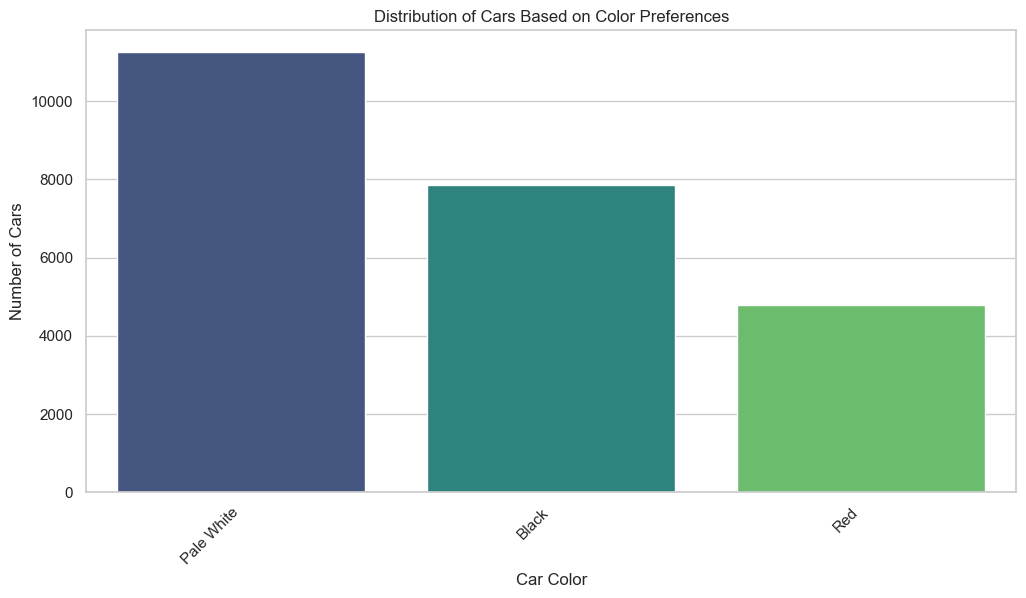

In [32]:
# Assuming df is your DataFrame with sales data
# Replace 'Color' with the actual column name in your DataFrame

# Count the number of cars for each color
color_counts = df['Color'].value_counts()

# Plot a bar chart to visualize the distribution of car colors
plt.figure(figsize=(12, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')
plt.xlabel('Car Color')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars Based on Color Preferences')

plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x600 with 0 Axes>

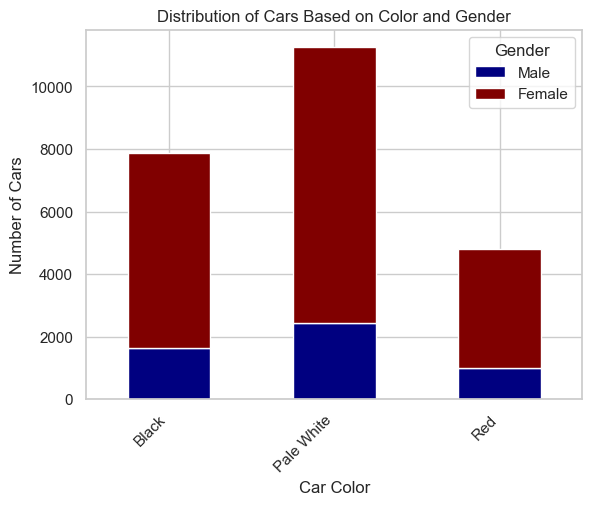

In [33]:
# Assuming df is your DataFrame with sales data
# Replace 'Color' and 'Gender' with the actual column names in your DataFrame

# Count the number of cars for each color and gender
color_gender_counts = df.groupby(['Color', 'Gender']).size().unstack(fill_value=0)

# Plot a grouped bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
color_gender_counts.plot(kind='bar', stacked=True, colormap='jet')

plt.xlabel('Car Color')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars Based on Color and Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'], loc='upper right')
plt.show()

9. Geographic Analysis:

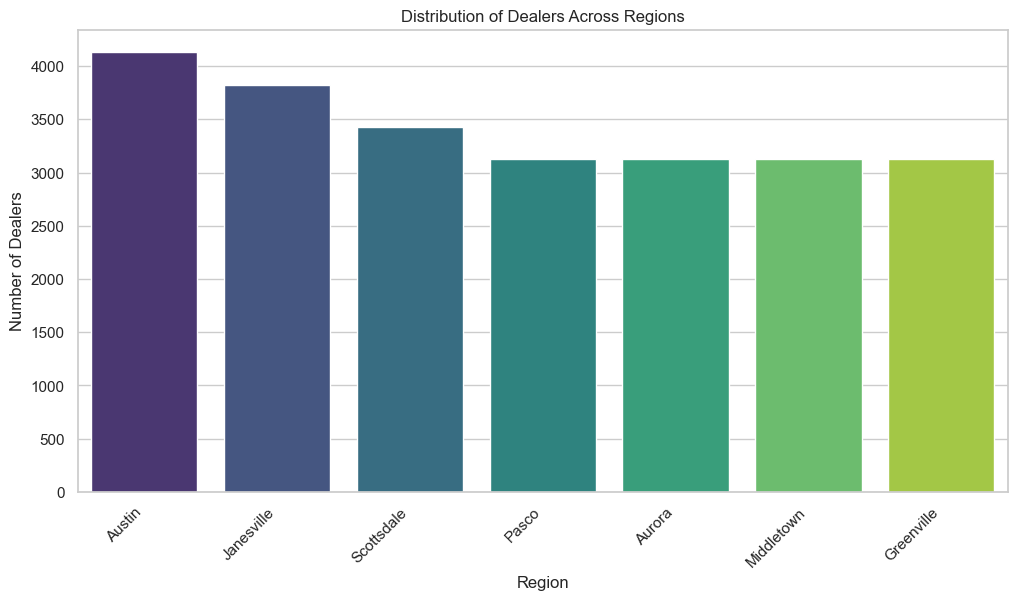

In [34]:
# Assuming df is your DataFrame with sales data
# Replace 'Dealer_Region' with the actual column name in your DataFrame

# Count the number of dealers in each region
region_dealer_counts = df['Dealer_Region'].value_counts()

# Plot a bar chart to visualize the distribution of dealers across regions
plt.figure(figsize=(12, 6))
sns.barplot(x=region_dealer_counts.index, y=region_dealer_counts.values, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Number of Dealers')
plt.title('Distribution of Dealers Across Regions')

plt.xticks(rotation=45, ha='right')
plt.show()

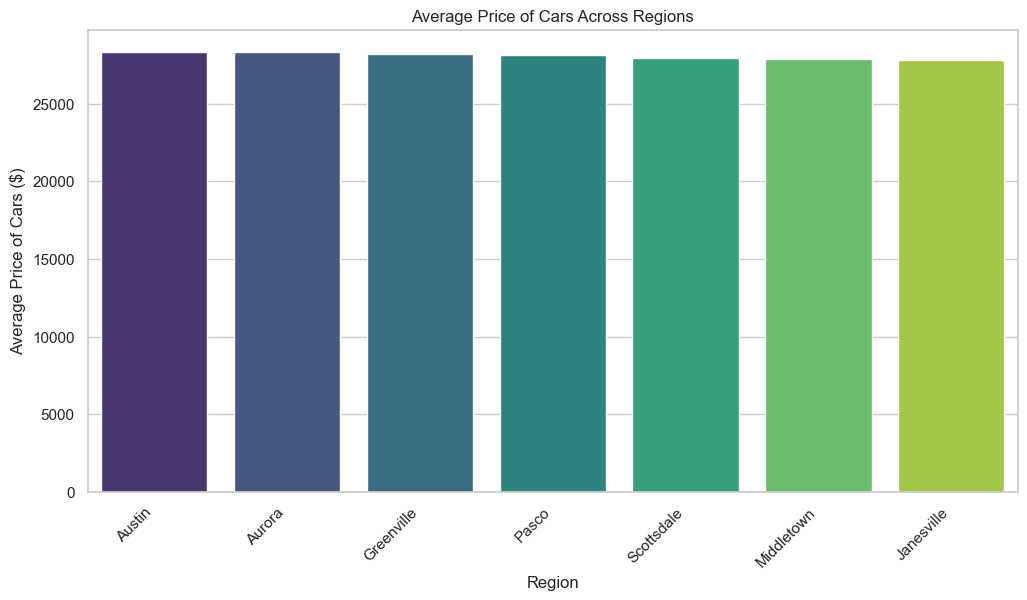

In [35]:
# Assuming df is your DataFrame with sales data
# Replace 'Dealer_Region' and 'Price ($)' with the actual column names in your DataFrame

# Group by region and calculate the average price of cars in each region
region_avg_price = df.groupby('Dealer_Region')['Price ($)'].mean().sort_values(ascending=False)

# Plot a bar chart to visualize the average price of cars across regions
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg_price.index, y=region_avg_price.values, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Average Price of Cars ($)')
plt.title('Average Price of Cars Across Regions')

plt.xticks(rotation=45, ha='right')
plt.show()

# B. Bivariate Analysis

3. Car Price vs. Annual Income:

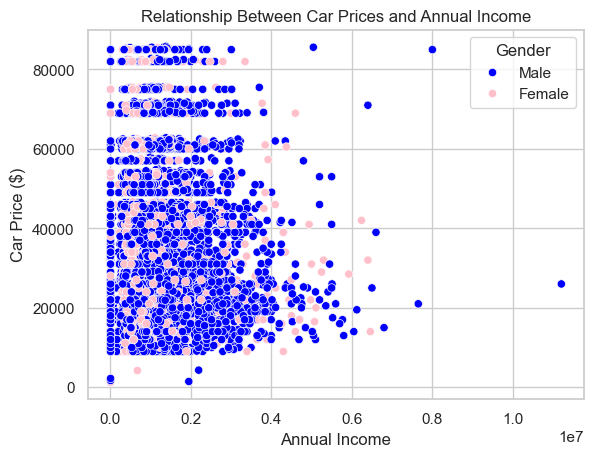

In [36]:
# Assuming df is your DataFrame with 'Price ($)' and 'Annual Income' columns

# Create a scatter plot
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Gender', palette={'Male': 'blue', 'Female': 'pink'})

# Set labels and title
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.title('Relationship Between Car Prices and Annual Income')

# Show the plot
plt.show()

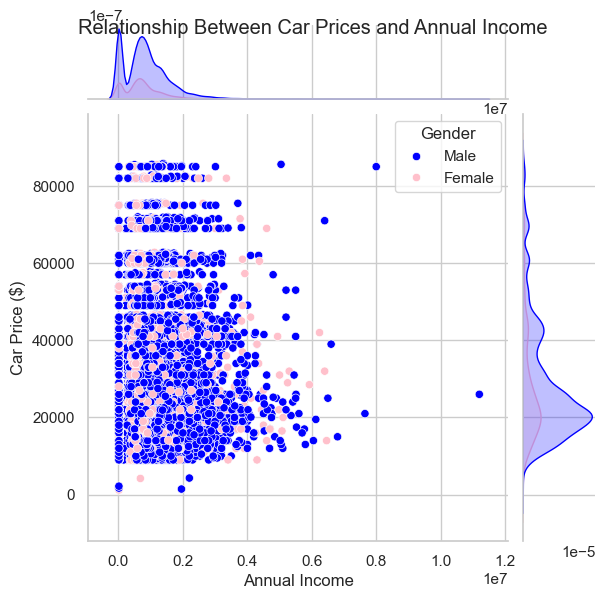

In [37]:
# Joint Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot with scatter and histograms
sns.jointplot(data=df, x='Annual Income', y='Price ($)', hue='Gender', kind='scatter', palette={'Male': 'blue', 'Female': 'pink'})

# Set labels and title
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.suptitle('Relationship Between Car Prices and Annual Income')

# Show the plot
plt.show()

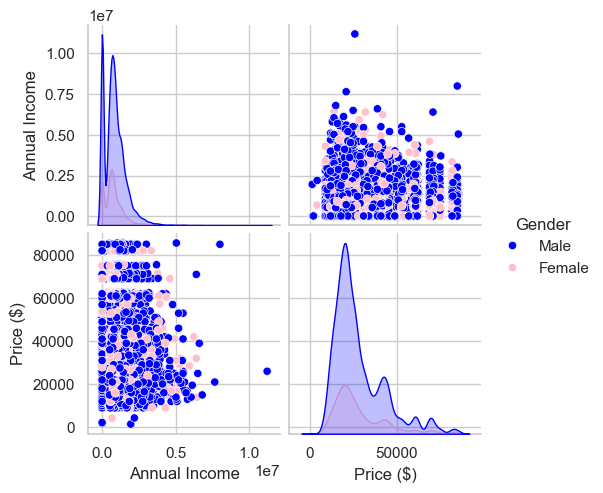

In [38]:
# Pair Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for multiple variables
sns.pairplot(data=df, vars=['Annual Income', 'Price ($)'], hue='Gender', palette={'Male': 'blue', 'Female': 'pink'})

# Show the plot
plt.show()

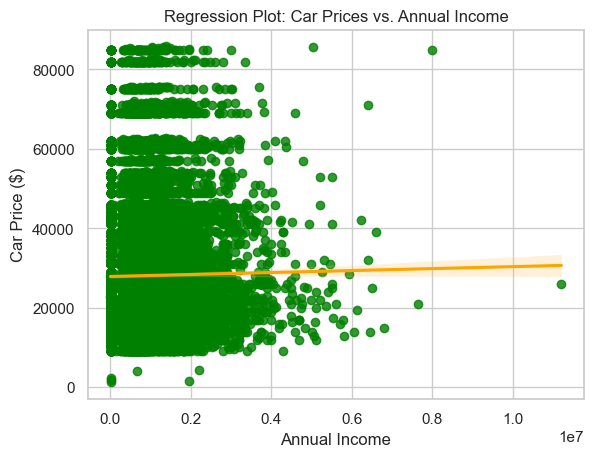

In [39]:
# Regression Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot
sns.regplot(data=df, x='Annual Income', y='Price ($)', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})

# Set labels and title
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.title('Regression Plot: Car Prices vs. Annual Income')

# Show the plot
plt.show()

10. Time Trend Analysis:

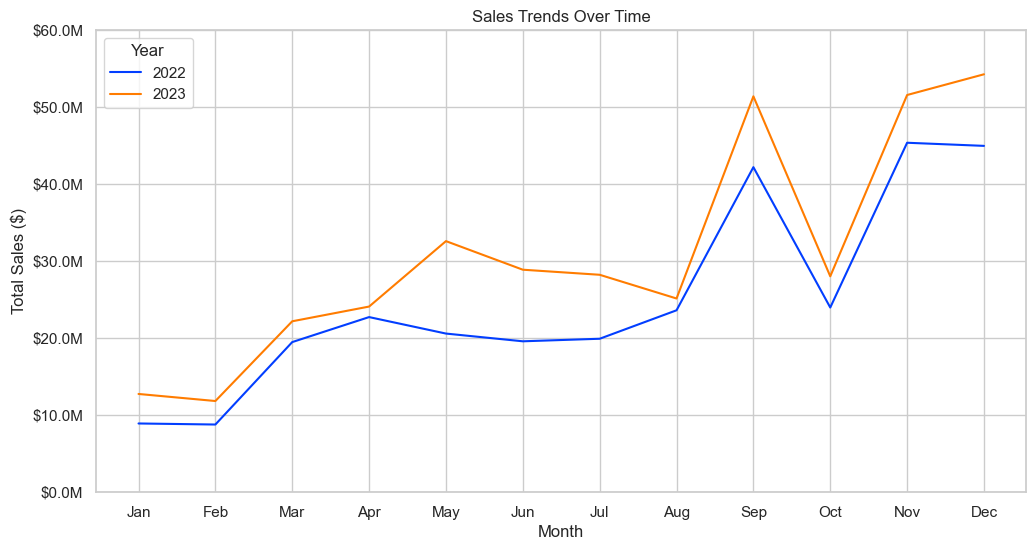

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame with sales data
# Replace 'Date' and 'Price ($)' with the actual column names in your DataFrame

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Price ($)'].sum().reset_index()

# Plot a line chart to visualize sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Price ($)', hue='Year', data=monthly_sales, palette='bright')  # Adjust palette here

# Set y-axis limits
plt.ylim(0, 60000000)

plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Sales Trends Over Time')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Format y-axis ticks to display values in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()


In [41]:
# Assuming df is your DataFrame
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Display the correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

               Annual Income  Price ($)     Phone     Month      Year
Annual Income       1.000000   0.012065 -0.000351 -0.015141 -0.031406
Price ($)           0.012065   1.000000 -0.000493  0.006856 -0.007511
Phone              -0.000351  -0.000493  1.000000  0.005470  0.006815
Month              -0.015141   0.006856  0.005470  1.000000 -0.023009
Year               -0.031406  -0.007511  0.006815 -0.023009  1.000000
